In [1]:
import xarray as xr
import pygmt
%matplotlib notebook

# project description
This is meant as a quick tutorial on how to plot up data using pygmt. We'll start by quierying data that are publically available that have been downloaded locally to the data directory that is part of this project. We start by loading the topographies as xarray datasets and calculate the reflection of light source projecting from the west (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon.

In [2]:
upstream_ds=xr.load_dataset('../data/bed/UpstreamGrid_maxL_0001m.nc')
downstream_ds=xr.load_dataset('../data/bed/DownstreamGrid_maxL_0001m.nc')
russell_ds=xr.load_dataset('../data/bed/IRTIT3_20110413_Russell.nc')
humboldt_ds=xr.load_dataset('../data/bed/IRTIT3_20130420_Humboldt.nc')

In [3]:
dgrid_upstream = pygmt.grdgradient(grid=upstream_ds['z'], radiance=[270, 30])
dgrid_downstream = pygmt.grdgradient(grid=downstream_ds['z'], radiance=[270, 30])
dgrid_russell = pygmt.grdgradient(grid=russell_ds['bed_elevation'], radiance=[270, 30])
dgrid_humboldt = pygmt.grdgradient(grid=humboldt_ds['bed_elevation'], radiance=[270, 30])

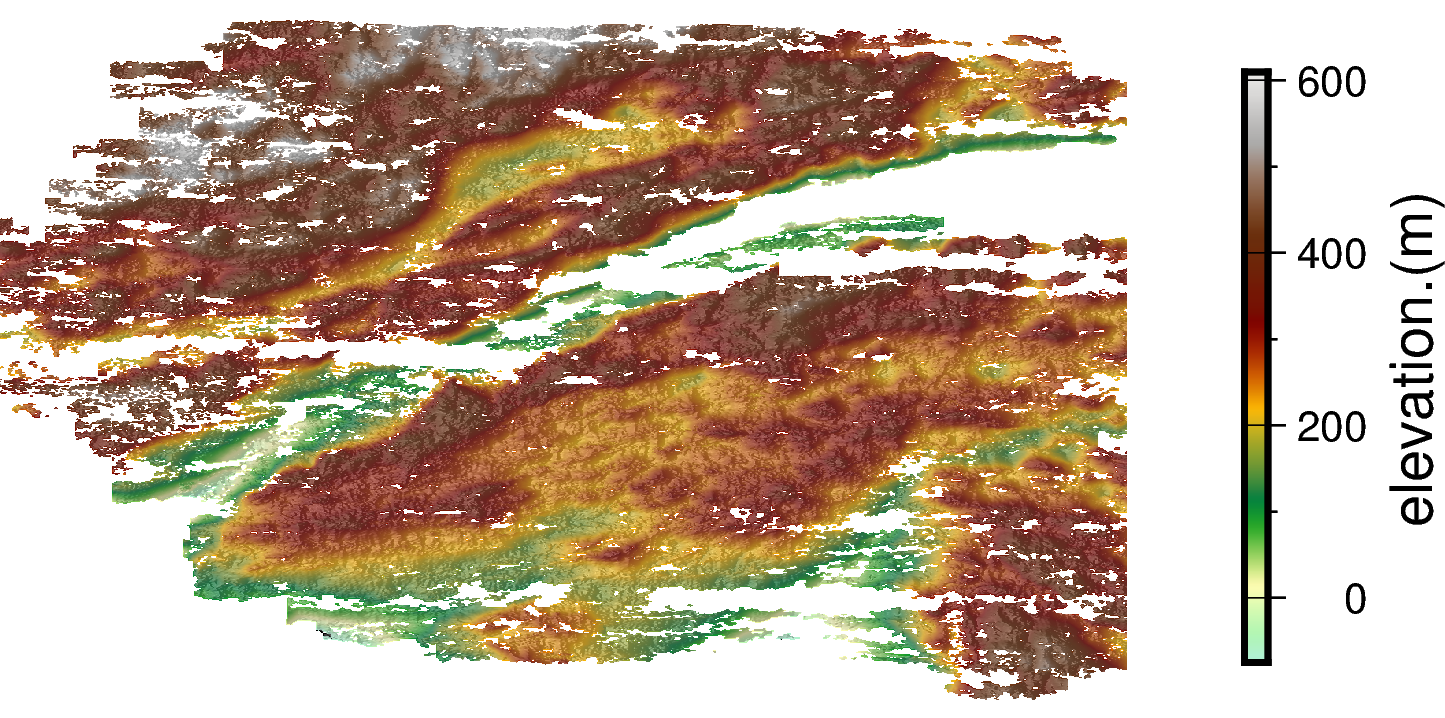

In [4]:
cmap_russell=pygmt.makecpt(cmap="dem4", series=[-75,610,1])
fig3 = pygmt.Figure()
projection='x1:300000'
region='-210000/-180000/-2550000/-2400000'
fig3.grdimage(grid=russell_ds['bed_elevation'],cmap=cmap_russell,nan_transparent=True,dpi=300,projection=projection,region=region)
fig3.colorbar(frame=["afg", "x+l elevation.(m)"],cmap=cmap_russell,position="JMR+o1c/-6c+w5c/0.2c+mc")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig3.grdimage(
    grid=dgrid_russell,
    projection=projection,region=region,
    cmap=True,
    transparency=60,
    nan_transparent=True
)

fig3.savefig(dpi=250,fname='figures/russell.png')
fig3.show()

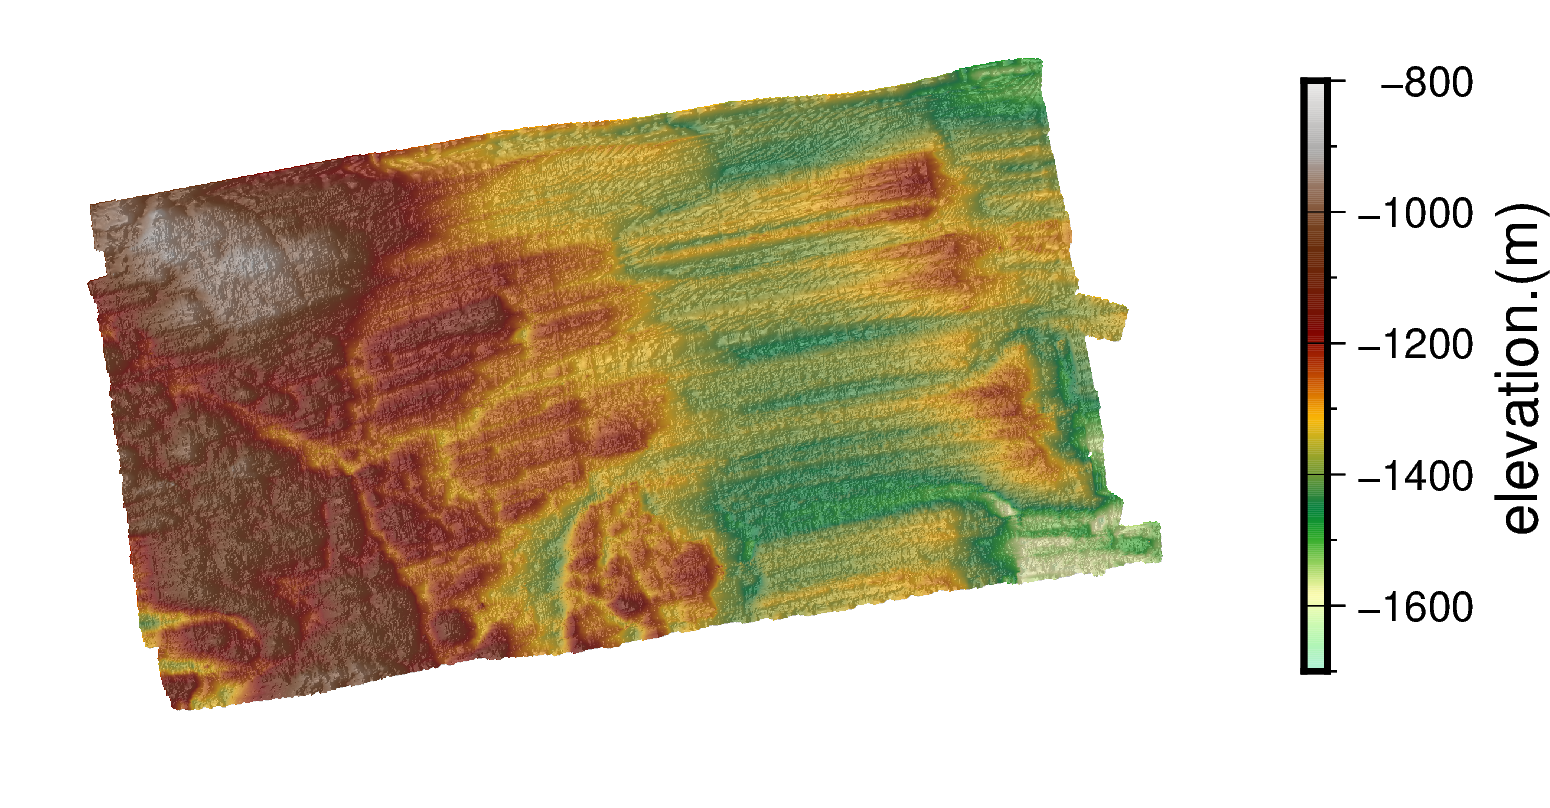

In [4]:
cmap_upstream=pygmt.makecpt(cmap="dem4", series=[-1700,-800,1])
fig1 = pygmt.Figure()
projection='x1:500000'
region='-1350000/-1250000/-470000/-420000'
fig1.grdimage(grid=upstream_ds['z'],cmap=cmap_upstream,nan_transparent=True,dpi=300,projection=projection,region=region)
fig1.colorbar(frame=["afg", "x+l elevation.(m)"],cmap=cmap_upstream,position="JMR+o-4c/0c+w5c/0.2c+mc")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig1.grdimage(
    grid=dgrid_upstream,
    projection=projection,region=region,
    cmap=True,
    transparency=60,
    nan_transparent=True
)

fig1.savefig(dpi=250,fname='figures/upstream.png')
fig1.show()

In [ ]:
cmap_downstream=pygmt.makecpt(cmap="dem4", series=[-1700,-800,1])
fig2 = pygmt.Figure()
projection='x1:500000'
region='-1550000/-1350000/-490000/-420000'
fig2.grdimage(grid=downstream_ds['z'],cmap=cmap_downstream,nan_transparent=True,dpi=300,projection=projection,region=region)
fig2.colorbar(frame=["afg", "x+l elevation.(m)"],cmap=cmap_downstream,position="JMR+o-4c/0c+w5c/0.2c+mc")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig2.grdimage(
    grid=dgrid_downstream,
    projection=projection,region=region,
    cmap=True,
    transparency=60,
    nan_transparent=True
)

fig2.savefig(dpi=250,fname='figures/downstream.png')
fig2.show()

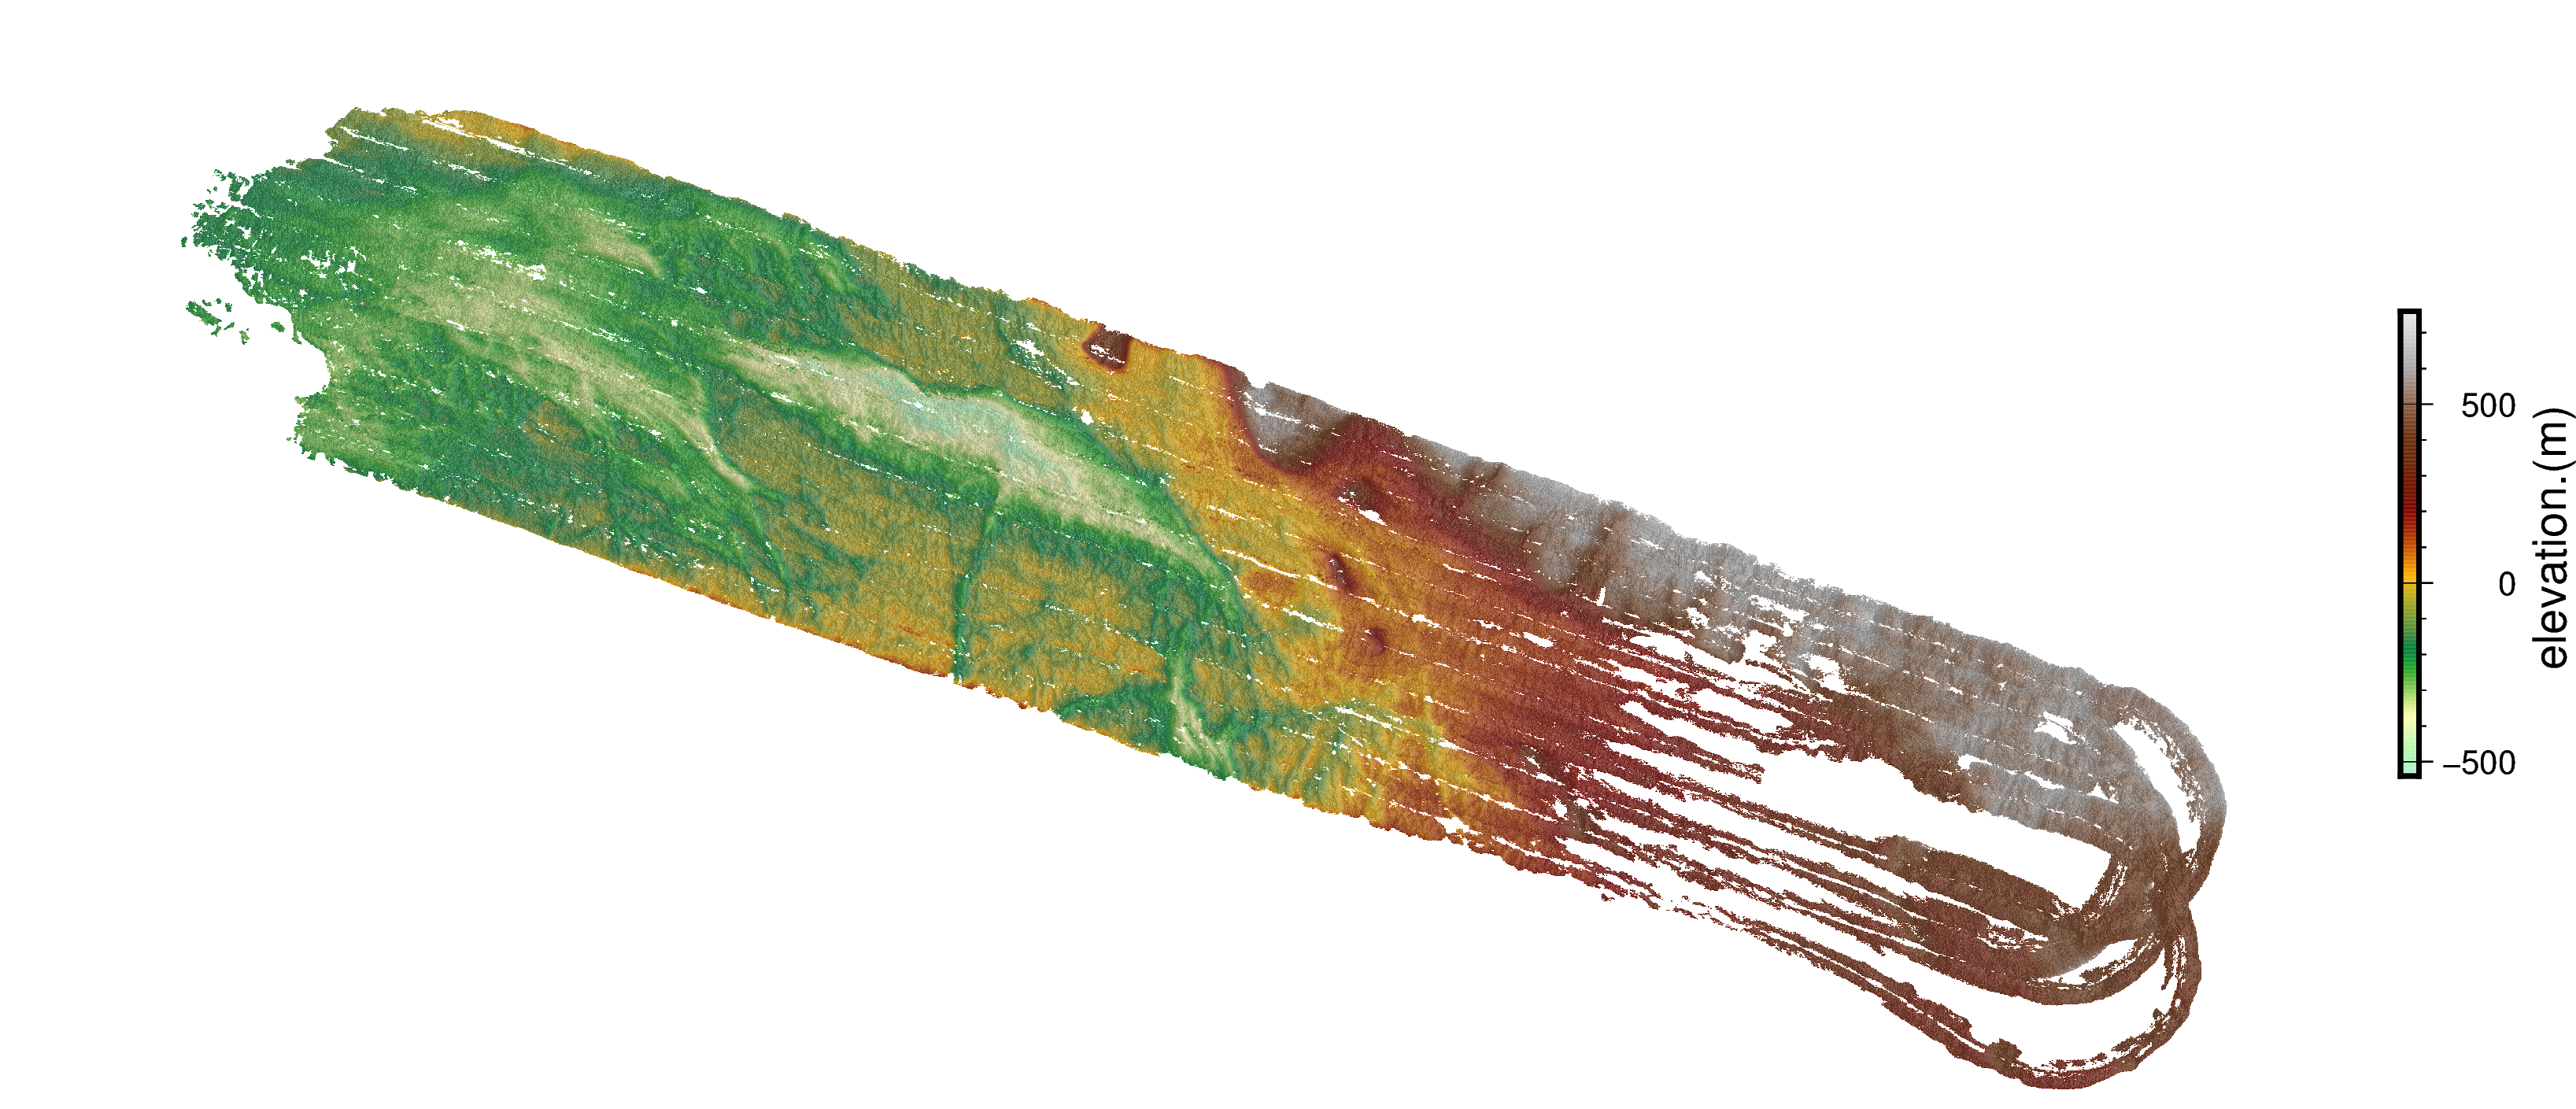

In [4]:
cmap_humboldt=pygmt.makecpt(cmap="dem4", series=[-540,760,1])
fig4 = pygmt.Figure()
projection='x1:500000'
region='-400000/-250000/-1100000/-1020000'
fig4.grdimage(grid=humboldt_ds['bed_elevation'],cmap=cmap_humboldt,nan_transparent=True,dpi=300,projection=projection,region=region)
fig4.colorbar(frame=["afg", "x+l elevation.(m)"],cmap=cmap_humboldt,position="JMR+o-1c/0c+w5c/0.2c+mc")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig4.grdimage(
    grid=dgrid_humboldt,
    projection=projection,region=region,
    cmap=True,
    transparency=60,
    nan_transparent=True
)

fig4.savefig(dpi=250,fname='figures/humboldt.png')
fig4.show()